<a href="https://colab.research.google.com/github/GabrielCalcada/Site-webpraia/blob/main/Re_Narwal_PC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
!pip install skymapper
!pip install pymangle
import skymapper as skm
import pymangle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Fazendo os imports e montando as tables

In [27]:
from astropy import units as u
from astropy.coordinates import SkyCoord
import numpy as np
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties



import matplotlib 


matplotlib.colors
matplotlib.colors.rgb_to_hsv
matplotlib.colors.to_rgba
matplotlib.figure.Figure.get_size_inches
matplotlib.figure.Figure.subplots_adjust
matplotlib.axes.Axes.text
matplotlib.patches.Rectangle
plt.ion()

import time

import cv2
import numpy as np
from astropy.io import fits
import matplotlib
import matplotlib.pyplot as plt
import os
import pandas as pd

import scipy

from astropy.table import Table, Column, join
from astropy.coordinates import SkyCoord
from astropy.table import Column
from numpy import *
import matplotlib.pyplot as plt
%matplotlib inline

#to crop the image
import numpy as np
import matplotlib.pyplot as plt
from astropy.nddata import Cutout2D
from astropy import units
from astropy.io import fits
import glob

from astropy import units as u
from astropy.coordinates import SkyCoord
import numpy as np
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties


# importing the required libraries For KDE plot
from sklearn import datasets
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline


import healpy as hp

In [28]:
#from google.colab import drive
#drive.mount('/content/drive')

In [29]:
#cd /content/drive/MyDrive/Protoclusters/Dados

#pwd #70chips

#!wget  --user=des --ask-password "http://slac.stanford.edu/~erykoff/catalogs/y3a2/redmapper/y3_gold_2.2.1_wide_sofcol_run2_redmapper_v6.4.22+2_lgt5_vl50_catalog.fit"

#ls

In [30]:
#Path dos arquivos que estão no hd

#catalog_path="/media/gabriel/ADATA HD710 PRO/Mestrado/Dados/"

In [31]:
hdu_bricks = fits.open('/content/drive/MyDrive/Mestrado/Dados/sva1_gold_r1.0_catalog.fits')
hdu_bricks.info()
bricks_data = hdu_bricks[1].data 

#hdu_bricks.close()

Filename: /content/drive/MyDrive/Mestrado/Dados/sva1_gold_r1.0_catalog.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       6   ()      
  1                1 BinTableHDU     90   25227559R x 41C   [K, D, D, I, J, J, J, J, J, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E]   


In [32]:
cols = hdu_bricks[1].columns
#print(cols)

In [33]:
#cols.info("name")

In [34]:
#hdul[1].columns

In [35]:
#Abrindo os dados da Skynet que contém photo-z info do SVA1 e criando uma tabela
%timeit

hdu_skynet = fits.open('/content/drive/MyDrive/Mestrado/Dados/sva1_gold_r1.0_skynet_point.fits')
hdu_skynet.info()
skynet_data = hdu_skynet[1].data 

hdu_skynet.close()


Filename: /content/drive/MyDrive/Mestrado/Dados/sva1_gold_r1.0_skynet_point.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       6   ()      
  1                1 BinTableHDU     12   25227559R x 2C   [K, E]   


In [36]:
cols_skynet = hdu_skynet[1].columns
cols_skynet.info("name")

name:
    ['COADD_OBJECTS_ID', 'Z_MEAN']


In [37]:
len(skynet_data['Z_MEAN'][:])

25227559

##############################################################################################

In [38]:
#data['RA'][:]

ID = np.array(bricks_data['COADD_OBJECTS_ID'][:])

RA = np.array(bricks_data['RA'][:])
DEC = np.array(bricks_data['DEC'][:])

MODEST_CLASS = np.array(bricks_data['MODEST_CLASS'][:])
FLAGS_G = np.array(bricks_data['FLAGS_G'][:])
BADFLAG = np.array(bricks_data['BADFLAG'][:])

MAG_G = np.array(bricks_data['MAG_AUTO_G'][:])

print(BADFLAG)

%timeit

[0 8 0 ... 0 0 0]


In [39]:
Z_MEAN = np.array(skynet_data['Z_MEAN'][:])
skynet_ID = np.array(skynet_data['COADD_OBJECTS_ID'][:])
print(max(Z_MEAN))
print(min(Z_MEAN))
print(len(Z_MEAN), len(skynet_ID))

1.3652344
0.06008911
25227559 25227559


# MODEST CLASS
0: Undetermined; 

1: Galaxies; 

2: Stars. 

# FLAGS_[G,R,I,Z]
SExtractor flags values (precut on FLAGS < 4)

0: No issue; 

1: Bright neighbors; 

2: Blended object. 

# BADFLAG
SVA1 GOLD flag definitions:

1: In the 10th percentile of worst junk regions (probably okay; 

2: In the 4th percentile of worst junk regions (probably bad); 

4: Near bright 2MASS star (very likely bad); 

8: Large offset between g- and i-band windowed positions (bad object).

##############################################################################################

# Selecting galaxies with DES MODEST CLASS

# MODEST CLASS
0: Undetermined; 

1: Galaxies; 

2: Stars. 

In [ ]:
#Index will recieve the position of the galaxies in the catalog
inicio = time.time()
#Time

cont = 0

#for i in range(len(MODEST_CLASS)):
#    if(MODEST_CLASS[i]==1):
#        cont = cont +1

#cont = np.count_nonzero(MODEST_CLASS == 1)

#Time
fim = time.time()
print(fim - inicio)

5.6743621826171875e-05


In [ ]:
#indices = np.zeros(cont)

#print(indices)

In [ ]:
#

#indices = np.where(MODEST_CLASS == 1)

#aux = 0
#for i in range(len(MODEST_CLASS)):
#    if(MODEST_CLASS[i]==1):
#        index[aux] = i
#        aux = aux + 1

#print(indices)
#print(len(indices[0]))

# Selection objetics with BADFLAG


# BADFLAG
SVA1 GOLD flag definitions:

1: In the 10th percentile of worst junk regions (probably okay); 

2: In the 4th percentile of worst junk regions (probably bad); 

4: Near bright 2MASS star (very likely bad); 

8: Large offset between g- and i-band windowed positions (bad object).

In [ ]:
##indices will recieve the position of the galaxies in the catalog and will select the best objects with the BADFLAG info and putting the position of the object in index_bdflg
inicio = time.time()


indices_bdflg = np.where((MODEST_CLASS == 1) & (BADFLAG <= 1))[0]

print(len(indices_bdflg))

fim = time.time()
print('Tempo de execução: ', fim - inicio)

20305398
Tempo de execução:  0.3051729202270508


In [ ]:
print(len(BADFLAG))
print(len(indices_bdflg))

for i in range(10):
    print(indices_bdflg[i])

25227559
20305398
0
2
3
4
5
6
7
8
9
10


# Removing galaxies with large erros in mag (>1 mag in any four bands)

In [40]:
# 'MAG_AUTO_G',
# 'MAG_AUTO_R',
# 'MAG_AUTO_I',
# 'MAG_AUTO_Z',

MAGERR_G = np.array(bricks_data['MAGERR_AUTO_G'][:])
MAGERR_R = np.array(bricks_data['MAGERR_AUTO_R'][:])
MAGERR_I = np.array(bricks_data['MAGERR_AUTO_I'][:])
MAGERR_Z = np.array(bricks_data['MAGERR_AUTO_Z'][:])

FLAGS_G = np.array(bricks_data['FLAGS_G'][:])
FLAGS_R = np.array(bricks_data['FLAGS_R'][:])
FLAGS_I = np.array(bricks_data['FLAGS_I'][:])
FLAGS_Z = np.array(bricks_data['FLAGS_Z'][:])

cont_MAG_G = 0
cont_MAG_R = 0
cont_MAG_I = 0
cont_MAG_Z = 0


indices = np.where((MODEST_CLASS == 1) & (BADFLAG < 1) & (MAGERR_G < 1) & (MAGERR_R < 1) & (MAGERR_I < 1) & (MAGERR_Z < 1) & (FLAGS_G == 0) & (FLAGS_R == 0) & (FLAGS_I == 0) & (FLAGS_Z == 0))[0]

#for i in range(len(index_bdflg)):
#    if(MAG_G[index_bdflg[i]] < 1):
#        cont_MAG_G = cont_MAG_G +1
#    if(MAG_R[index_bdflg[i]] < 1):
#        cont_MAG_R = cont_MAG_R +1
#    if(MAG_I[index_bdflg[i]] < 1):
#        cont_MAG_I = cont_MAG_I +1
#    if(MAG_Z[index_bdflg[i]] < 1):
#        cont_MAG_Z = cont_MAG_Z +1

In [41]:
#mask = (mag < 20)*(emag < 1)
#newmag = mag[mask]

In [42]:
#for i in range(8):
 #   print('MODEST_CLASS: ', MODEST_CLASS[i], 'FLAGS_G: ', FLAGS_G[i], 'BADFLAG: ',BADFLAG[i])

In [43]:
inicio = time.time()

Z = np.array([0.0]*len(indices))
print(len(Z))
print(len(indices))
print(len(Z_MEAN))

Z = Z_MEAN[indices]
    
#print(Z)

fim = time.time()
print('Tempo de execução: ', fim - inicio)




#inicio = time.time()

#Z = np.empty

#for num in indices:
#    np.append(Z, Z_MEAN[num])
    
##print(len(Z))

#fim = time.time()
#print('Tempo de execução: ', fim - inicio)

14410694
14410694
25227559
Tempo de execução:  4.384217023849487


In [44]:
print(len(Z))

14410694


In [45]:
ra1 = RA[indices]
dec1 = DEC[indices]

ra1[ra1>180] = ra1[ra1>180] - 360.0

#Z2 = Z[(Z > 0.2) & (Z < 1.24)]

ra2  = ra1[(ra1>60) & (ra1<90) & (dec1>-62) & (dec1<-42.5)]
dec2 = dec1[(ra1>60) & (ra1<90) & (dec1>-62) & (dec1<-42.5)]

# Creating redshift bins

In [ ]:
from astropy import cosmology

LCDM=cosmology.LambdaCDM(H0=70, Om0=0.3, Ode0=0.7)

# fazer os passos do 0.03 a partir de, por exemplo, 0.9-1.1; 0.93-1.13
dz = 0.03

zbins=np.arange(0.9,1.1,dz) # THIS SETS UP THE EDGES OF YOUR BINS (dz is your redshift binwidth)

bincenters = (zbins[:-1] + zbins[1:]) / 2.0  # THIS CALCULATES THE CENTER OF THE BIN

dvol=LCDM.differential_comoving_volume(zbins).value  # THIS GETS  VOL PER UNIT REDSHIFT PER UNIT SOLID ANGLE

dvol=4.*np.pi * dz * dvol # THIS GETS THE TOTAL VOLUME WITHIN EACH BIN OF REDSHIFT

In [ ]:
print(zbins, bincenters, dvol)

[0.9  0.93 0.96 0.99 1.02 1.05 1.08] [0.915 0.945 0.975 1.005 1.035 1.065] [9.06426274e+09 9.35877981e+09 9.64391356e+09 9.91960452e+09
 1.01858360e+10 1.04426287e+10 1.06900365e+10]


In [ ]:
from astropy.cosmology import Planck18 as cosmo

hist_bins = np.round(24*3600/(cosmo.arcsec_per_kpc_comoving(Z+0.05).value*5e+3)) # plot_side=24 deg; bin_size = 5000 kpc -> 5Mpc

In [ ]:
print(hist_bins)

[319. 251. 223. ... 129. 290. 273.]


In [ ]:
Z2 = Z[(Z > 0.2) & (Z < 1.24)]

In [ ]:
0,2 - 0.4 - 0.6 - 0.8 - 1.0 - 1.24



slices = np.array([0, 1, 2, 3, 4, 5],[0,0,0,0,0])

for num in Z:
  if((num >= 0.2) & (num < 0.4)):
    np.append(slices, num, 1)
print(slices)

# Plotting the histogram

1.3652344 0.06008911


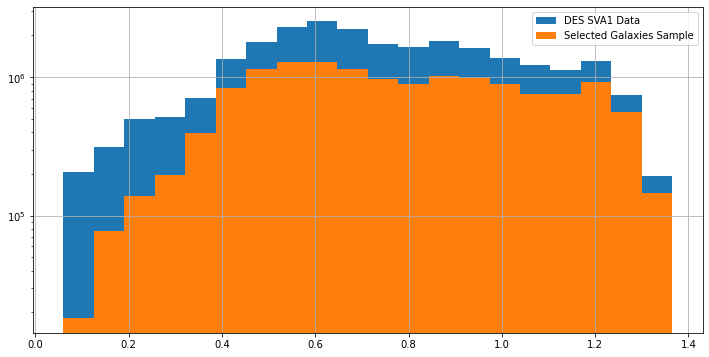

In [ ]:

w = 0.067

a = np.max(Z_MEAN)
b = np.min(Z_MEAN)

print(a, b)

n1 = math.ceil((a - b )/w)

w = 0.067

a = np.max(Z)
b = np.min(Z)

n = math.ceil((a - b)/w)

plt.figure(figsize=(12, 6))
plt.hist(Z_MEAN, bins = n1, label='DES SVA1 Data')
plt.hist(Z, bins = n, label='Selected Galaxies Sample')
plt.grid(True)
#plt.ylim([10**4, 10**6])
plt.yscale('log')

plt.legend(bbox_to_anchor=(1., 1), loc='upper right')
plt.show()


In [ ]:
#bins

# Saving the index info in an Table and then in an file, so we don't need to run everything again

In [ ]:
t = Table([Z,indices], names=('Z', 'indices'))

In [ ]:
from tabulate import tabulate
with open('/content/drive/MyDrive/Mestrado/Dados/Re-Narwal.txt', 'w') as f:
    f.write(tabulate(t))

# Opening the file Re-Narwal.txt and reading Z and index_bdflg info

In [ ]:
file = open(catalog_path+'Re-Narwal.txt', 'r')

In [ ]:
#Z = np.array([0.0])
#index_bdflg = np.array([0.0])
cont = 1000000
for line in file:
    values = line.split()
    cont = cont+1


Z = []
index_bdflg = []

for line in file:
    values = line.split()
    Z.append(float(values[0]))
    index_bdflg.append(float(values[1]))
    
#ra_deg = (ra_h + ra_m/60. + ra_s/3600.) * 15
#dec_deg = (ra_d + ra_m/60. + ra_s/3600.)
    
#ra_deg2 = str(ra_deg)
#dec_deg2 = str(dec_deg)

In [ ]:
print(index_bdflg[1])

IndexError: list index out of range

# Aitoff projections of the selected galaxies

In [ ]:
print((RA[indices[1]]-75)*math.cos(DEC[indices[1]]))
math.cos(DEC[indices[i]])

-11.38248915039927


NameError: ignored

In [ ]:
#c1 = SkyCoord(ra=RA_new*u.degree, dec=DEC_new*u.degree)

#ra_rad1 = c1.ra.wrap_at(180 * u.deg).radian
#dec_rad1 = c1.dec.radian

#ra_rad2 = [0.0]*len(ra_rad1)

#for i in range(len(index_bdflg)):
#    ra_rad2[i] = (ra_rad1[index_bdflg[i]]-75)*math.cos(dec_rad1[index_bdflg[i]])

In [ ]:
ra = bricks_data['RA']
dec = bricks_data['DEC']
ra[ra>180] = ra[ra>180] - 360.0
ra_rad = np.radians(ra)
dec_rad = np.radians(dec)
plt.figure()
plt.subplot(111,projection='aitoff')
plt.rcParams['agg.path.chunksize'] = 10000
plt.scatter(ra_rad,dec_rad, alpha=0.9)
plt.xlabel('RA (deg)')
plt.ylabel('DEC (deg)')
plt.grid(True)

In [ ]:
ra1 = RA[indices]
dec1 = DEC[indices]

ra1[ra1>180] = ra1[ra1>180] - 360.0

In [ ]:
#Z2 = Z[(Z > 0.2) & (Z < 1.24)]

ra2  = ra1[(ra1>60) & (ra1<90) & (dec1>-62) & (dec1<-42.5)]
dec2 = dec1[(ra1>60) & (ra1<90) & (dec1>-62) & (dec1<-42.5)]

In [ ]:
#mask = (mag < 20)*(emag < 1)
#newmag = mag[mask]
#mpl.rcParams['agg.path.chunksize'] = 100000000

ra1[ra1>180] = ra1[ra1>180] - 360.0

ra_rad = np.radians(ra1)
dec_rad = np.radians(dec1)
plt.figure(figsize=(8,4.2))
plt.subplot(111,projection='aitoff')
plt.rcParams['agg.path.chunksize'] = 10000
plt.scatter(ra_rad,dec_rad, alpha=0.9)
plt.xlabel('RA (deg)')
plt.ylabel('DEC (deg)')
plt.grid(True)

#for i in range(len(indices)):
#    RA_new[i] = (RA[indices[i]]-75)#*math.cos(DEC[indices[i]])
#    DEC_new[i] = DEC[indices[i]]

In [ ]:
#mask = (mag < 20)*(emag < 1)
#newmag = mag[mask]
#mpl.rcParams['agg.path.chunksize'] = 100000000

ra2[ra2>180] = ra2[ra2>180] - 360.0

ra_rad = np.radians(ra2)
dec_rad = np.radians(dec2)
plt.figure(figsize=(8,4.2))
plt.subplot(111,projection='aitoff')
plt.rcParams['agg.path.chunksize'] = 10000
plt.scatter(ra_rad,dec_rad, alpha=0.9)
plt.xlabel('RA (deg)')
plt.ylabel('DEC (deg)')
plt.grid(True)

#for i in range(len(indices)):
#    RA_new[i] = (RA[indices[i]]-75)#*math.cos(DEC[indices[i]])
#    DEC_new[i] = DEC[indices[i]]

# Aitoff projection that had to work but it's not

In [ ]:
ra_random = ra1* u.degree
dec_random = dec1 * u.degree

c = SkyCoord(ra=ra_random, dec=dec_random, frame='icrs')


ra_rad = c.ra.wrap_at(180 * u.deg).radian
dec_rad = c.dec.radian


import matplotlib.pyplot as plt
plt.figure(figsize=(8,4.2))
plt.subplot(111, projection="aitoff")
plt.title("Aitoff projection of our random data")
plt.grid(True)
plt.plot(ra_rad, dec_rad, 'o', markersize=2, alpha=0.3)
plt.subplots_adjust(top=0.95,bottom=0.0)
plt.show()

# Hexbin plot

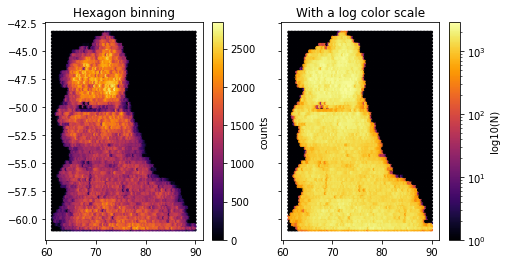

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Fixing random state for reproducibility
np.random.seed(19680801)

n = 100000
x = ra2
y = dec2
xmin = ra2.min()
xmax = ra2.max()
ymin = dec2.min()
ymax = dec2.max()

fig, axs = plt.subplots(ncols=2, sharey=True, figsize=(7, 4))
fig.subplots_adjust(hspace=0.5, left=0.07, right=0.93)
ax = axs[0]
hb = ax.hexbin(x, y, gridsize=100, cmap='inferno')
#ax.axis([50, 100, -63, -40])
ax.set_title("Hexagon binning")
cb = fig.colorbar(hb, ax=ax)
cb.set_label('counts')



ax = axs[1]
hb = ax.hexbin(x, y, gridsize=100, bins='log', cmap='inferno')
#ax.axis([50, 100, -63, -40])
#ax.axis([50, 100, -61, -42.5])
ax.set_title("With a log color scale")
cb = fig.colorbar(hb, ax=ax)
cb.set_label('log10(N)')


plt.show()

# fazer os passos do 0.03 a partir de, por exemplo, 0.9-1.1; 0.93-1.13

#bokeh
#healpy

In [ ]:
#mask = (mag < 20)*(emag < 1)
#newmag = mag[mask]

# Regular plot 

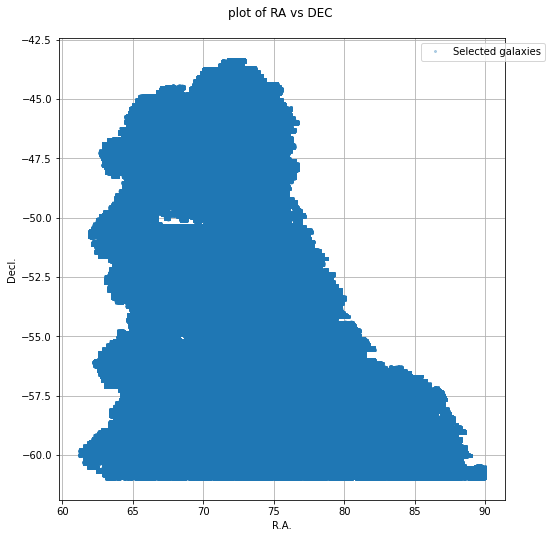

In [ ]:
plt.figure(figsize=(8,8.5))
#plt.title("plot of magnitude in ch2 versus ch1 - ch2\n")
plt.title("plot of RA vs DEC \n")
plt.grid(True)
plt.plot(ra2, dec2, 'o', markersize=2, alpha=0.3)
#lt.ylim([-62, -42.5])
#plt.xlim([55, 90])

plt.legend(['Selected galaxies'],bbox_to_anchor=(1.1, 1), loc='upper right')

plt.xlabel('R.A.')
plt.ylabel('Decl.')
plt.show()

# Another type of plot

In [ ]:
# alternative: define the optimal projection for set of coordinates
# by minimizing the variation in distortion

crit = skm.stdDistortion
proj = skm.Albers.optimize(ra2, dec2, crit=crit)

optimizing parameters of Albers to minimize stdDistortion
best objective 0.003094 at Albers(73.71445354238132,-53.987034,-58.70352231083949,-48.02975587011128)


In [ ]:
# 2) construct map: will hold figure and projection
# the outline of the sphere can be styled with kwargs for matplotlib Polygon
map = skm.Map(proj)

# 3) add graticules, separated by 15 deg
# the lines can be styled with kwargs for matplotlib Line2D
# additional arguments for formatting the graticule labels
sep = 15
map.grid(sep=sep)

# 4) add data to the map, e.g.
# make density plot
nside = 50
mappable = map.density(ra2, dec2, nside=nside)
cb = map.colorbar(mappable, cb_label="$n_g$ [arcmin$^{-2}$]")

# add scatter plot
map.scatter(ra2, dec2, s=len(ra2), edgecolor='k', facecolor='None')

# focus on relevant region
#map.focus(ra2, dec2)


#Tabela de escala do nside e tamanho de escala (Pesquisar)

In [ ]:
type(ra2)

TypeError: ignored

In [ ]:
AUX = ra2[(ra2 > 60) & (ra2<77)  & (dec2 > -44.3) & (dec2 < -42.5)]  

AUX1 = dec2[(ra2>60) & (ra2<90) & (dec2 >-44.3) & (dec2<-42.5)]

(array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.00053989, ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.00256551, 0.00214071, 0.00196703, ..., 0.        , 0.        ,
         0.        ],
        [0.00284173, 0.0025111 , 0.00245878, ..., 0.        , 0.        ,
         0.        ],
        [0.00256132, 0.00281452, 0.00191471, ..., 0.        , 0.        ,
         0.        ]]),
 array([61.202633  , 61.49060639, 61.77857978, 62.06655317, 62.35452656,
        62.64249995, 62.93047334, 63.21844673, 63.50642012, 63.79439351,
        64.0823669 , 64.37034029, 64.65831368, 64.94628707, 65.23426046,
        65.52223385, 65.81020724, 66.09818063, 66.38615402, 66.67412741,
        66.9621008 , 67.25007419, 67.53804758, 67.82602097, 68.11399436,
        68.40196775, 68.68994114, 68.9779145

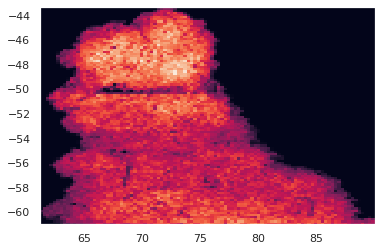

In [ ]:
plt.hist2d(ra2,dec2, bins=100, density=True, )

In [84]:
format = "%s is my friend and %s is %s years old" 
a = 1+2
Ross_Info = (a, "he", 28)
Rachael_Info = ("Rachael", "she", 28)

print(format % Ross_Info) 

3 is my friend and he is 28 years old


#Protocluster candidate redshif [0.5, 0.8]

In [ ]:
aux = 0
i=0
a=0.5
b=0.6

Z2 = Z[(ra1>60) & (ra1<90) & (dec1>-62) & (dec1<-42.5)]

while((aux+b) <= 0.83):

  ra3  = ra2[(Z2 > round(a+aux, 2)) & (Z2 < round(b+aux, 2))]
  dec3 = dec2[(Z2 > round(a+aux, 2)) & (Z2 < round(b+aux, 2))]

  counts,xbins,ybins,image = plt.hist2d(ra3, dec3,bins=100, cmap = "viridis")
  plt.colorbar()
  plt.contour(counts.transpose(),extent=[xbins[0],xbins[-1],ybins[0],ybins[-1]], levels = 1, linwidths=1, colors = 'k') #[2000,3000,4000,5000,5500];;;;; [2150,2500,2600,3000];;;;; [2430,2600,3000]
  title = "Redshift bin: " #[%d, %d]
  aa = ((a+aux), (b+aux))

  plt.title(title+'['+str(round(a+aux, 2))+', '+str(round(b+aux, 2))+']' )


  format = "/content/drive/MyDrive/Protoclusters/Resultados/Figuras/Gabriel/Proto_can_0.5_0.8/Tom%2.2d.png"
  plt.savefig(format % i)
  plt.show()
  aux += 0.03
  i +=1

In [122]:
import glob
from PIL import Image

# filepaths
fp_in = "/content/drive/MyDrive/Protoclusters/Resultados/Figuras/Gabriel/Proto_can_0.5_0.8/Tom*.png"
fp_out = "/content/drive/MyDrive/Protoclusters/Resultados/Figuras/Gabriel/Proto_can_0.5_0.8/image.gif"

# https://pillow.readthedocs.io/en/stable/handbook/image-file-formats.html#gif
imgs = (Image.open(f) for f in (glob.glob(fp_in)))
img = next(imgs)  # extract first image from iterator
img.save(fp=fp_out, format='GIF', append_images=imgs,
         save_all=True, duration=400, loop=0)

# Protocluster candidate redshif [0.9, 1.1]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: The following kwargs were not used by contour: 'linwidths'
  from ipykernel import kernelapp as app


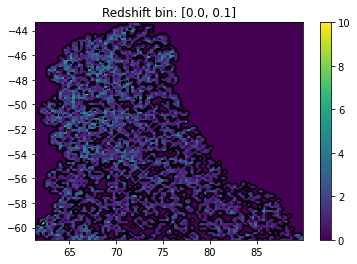

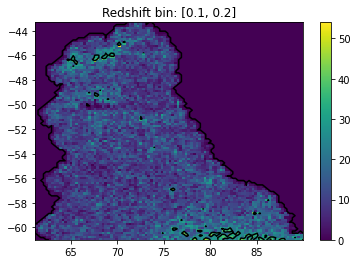

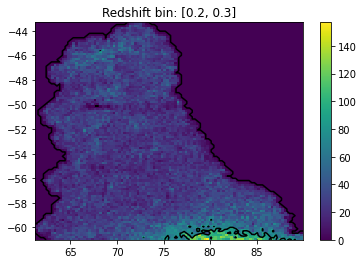

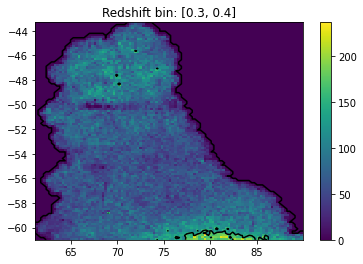

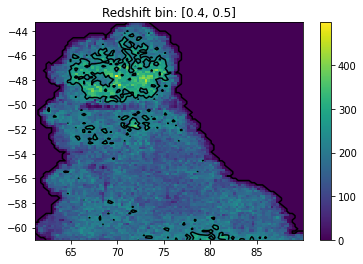

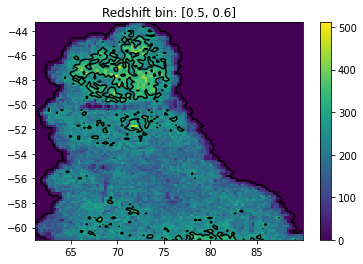

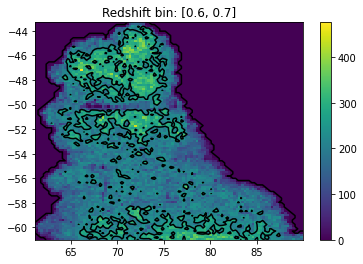

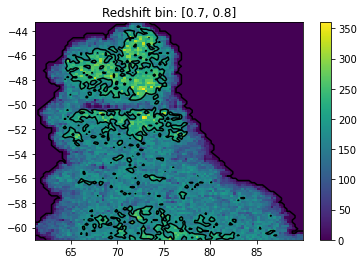

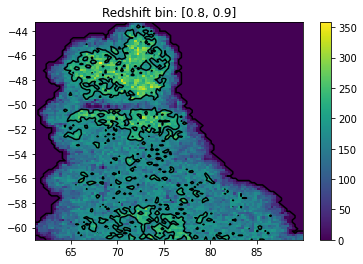

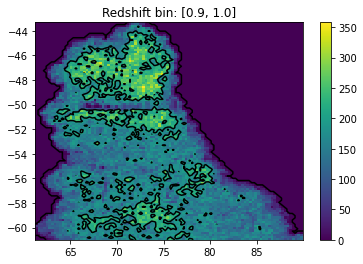

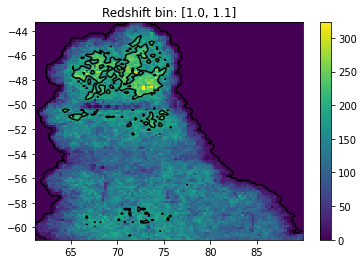

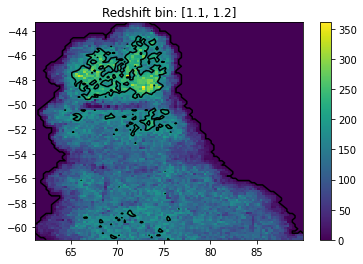

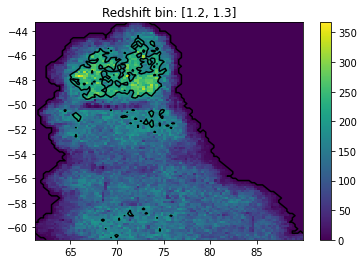

In [117]:
aux = 0
i=0
a=0.0
b=0.1

Z2 = Z[(ra1>60) & (ra1<90) & (dec1>-62) & (dec1<-42.5)]

while((aux+b) <= 1.4):

  ra3  = ra2[(Z2 > round(a+aux, 2)) & (Z2 < round(b+aux, 2))]
  dec3 = dec2[(Z2 > round(a+aux, 2)) & (Z2 < round(b+aux, 2))]

  counts,xbins,ybins,image = plt.hist2d(ra3, dec3,bins=100, cmap = "viridis")
  plt.colorbar()
  plt.contour(counts.transpose(),extent=[xbins[0],xbins[-1],ybins[0],ybins[-1]], levels = 1, linwidths=1, colors = 'k') #[2000,3000,4000,5000,5500];;;;; [2150,2500,2600,3000];;;;; [2430,2600,3000]
  title = "Redshift bin: " #[%d, %d]
  aa = ((a+aux), (b+aux))

  plt.title(title+'['+str(round(a+aux, 2))+', '+str(round(b+aux, 2))+']' )


  format = "/content/drive/MyDrive/Protoclusters/Resultados/Figuras/Gabriel/Proto_can_0.9_1.1/Tom%2.2d.png"
  plt.savefig(format % i)
  plt.show()
  aux += 0.1
  i +=1

In [113]:
import glob
from PIL import Image

# filepaths
fp_in = "/content/drive/MyDrive/Protoclusters/Resultados/Figuras/Gabriel/Proto_can_0.9_1.1/Tom*.png"
fp_out = "/content/drive/MyDrive/Protoclusters/Resultados/Figuras/Gabriel/Proto_can_0.9_1.1/image.gif"

# https://pillow.readthedocs.io/en/stable/handbook/image-file-formats.html#gif
imgs = (Image.open(f) for f in (glob.glob(fp_in)))
img = next(imgs)  # extract first image from iterator
img.save(fp=fp_out, format='GIF', append_images=imgs,
         save_all=True, duration=400, loop=0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: The following kwargs were not used by contour: 'linwidths'
  This is separate from the ipykernel package so we can avoid doing imports until


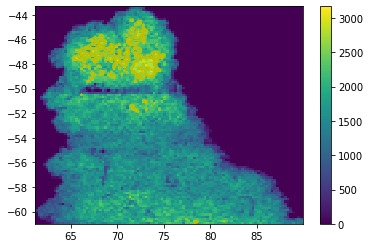

In [ ]:
counts,xbins,ybins,image = plt.hist2d(ra2, dec2,bins=100, cmap = "viridis")
plt.colorbar()
plt.contour(counts.transpose(),extent=[xbins[0],xbins[-1],ybins[0],ybins[-1]], levels = [2430,2600,3000], linwidths=1, colors = 'w') #[2000,3000,4000,5000,5500];;;;; [2150,2500,2600,3000];;;;; [2430,2600,3000]


In [ ]:
print(len(counts))

NameError: ignored

# KDE plot

In [ ]:
fixed_ra = ra2.byteswap().newbyteorder()

#swapped_end_arr = big_end_arr.byteswap().newbyteorder()

fixed_dec = dec2.byteswap().newbyteorder()

#ra2  = ra1[(ra1>60) & (ra1<90) & (dec1>-62) & (dec1<-42.5)]
#dec2 = dec1[(ra1>60) & (ra1<90) & (dec1>-62) & (dec1<-42.5)]



#Seleção dos dados da parte superior da estrutura

ref7 = fixed_ra[(fixed_ra > 60) & (fixed_ra<77)  & (fixed_dec > -50) & (fixed_dec < -42.5)]  

ref8 = fixed_dec[(fixed_ra>60) & (fixed_ra<90) & (fixed_dec >-50) & (fixed_dec<-42.5)]

#df = pd.DataFrame({'A': [a], 'B': [b]})

data_df_ra = pd.DataFrame({'RA': ref7})
data_df_dec = pd.DataFrame({'DEC': ref8})


#TESTE PARA DIMINUIR A QUANTIDADE DE DADOS

AUX = fixed_ra[(fixed_ra > 60) & (fixed_ra<77)  & (fixed_dec > -44.3) & (fixed_dec < -42.5)]  

AUX1 = fixed_dec[(fixed_ra>60) & (fixed_ra<90) & (fixed_dec >-44.3) & (fixed_dec<-42.5)]

#df = pd.DataFrame({'A': [a], 'B': [b]})

TEST_ra = pd.DataFrame({'RA': AUX})
TEST_dec = pd.DataFrame({'DEC': AUX1})


In [ ]:
print(np.min(fixed_ra))
print(np.max(fixed_ra))

print(np.min(fixed_dec))
print(np.max(fixed_dec))

61.202633
89.999972
-61.000785
-43.30805


In [ ]:
print('data_df_ra: \n', data_df_ra)
print('\n\n')
print('TEST_ra: \n', TEST_ra)

data_df_ra: 
                 RA
0        67.823596
1        67.746228
2        66.847170
3        66.930293
4        67.820379
...            ...
2721908  69.919686
2721909  69.892554
2721910  69.958354
2721911  69.861817
2721912  69.858686

[2721913 rows x 1 columns]



TEST_ra: 
               RA
0      72.952120
1      73.873772
2      73.924193
3      73.931265
4      73.005940
...          ...
95805  69.919686
95806  69.892554
95807  69.958354
95808  69.861817
95809  69.858686

[95810 rows x 1 columns]


In [ ]:
#df2 = pd.DataFrame({'A':a,'B':b})

data = pd.concat([
    data_df_ra,
    data_df_dec
], axis=1, ignore_index=False)

print(data)


TEST_data = pd.concat([
    TEST_ra,
    TEST_dec
], axis=1, ignore_index=False)

print(TEST_data)

#df =  pd.DataFrame(ref7, ref8, columns=list('AB'))

#df

                RA        DEC
0        67.823596 -45.314942
1        67.746228 -45.315161
2        66.847170 -45.314868
3        66.930293 -45.315042
4        67.820379 -45.314758
...            ...        ...
2722363        NaN -43.992923
2722364        NaN -43.964162
2722365        NaN -43.999947
2722366        NaN -43.991859
2722367        NaN -43.989054

[2722368 rows x 2 columns]
              RA        DEC
0      72.952120 -44.299766
1      73.873772 -44.299953
2      73.924193 -44.299599
3      73.931265 -44.299488
4      73.005940 -44.299593
...          ...        ...
95805  69.919686 -43.992923
95806  69.892554 -43.964162
95807  69.958354 -43.999947
95808  69.861817 -43.991859
95809  69.858686 -43.989054

[95810 rows x 2 columns]


In [ ]:
print(data_df_ra)

                RA
0        67.823596
1        67.746228
2        66.847170
3        66.930293
4        67.820379
...            ...
2721908  69.919686
2721909  69.892554
2721910  69.958354
2721911  69.861817
2721912  69.858686

[2721913 rows x 1 columns]


In [ ]:
print(data['RA'] == NaN)

0          False
1          False
2          False
3          False
4          False
           ...  
2722363    False
2722364    False
2722365    False
2722366    False
2722367    False
Name: RA, Length: 2722368, dtype: bool


In [ ]:

#AUX = fixed_ra[(fixed_ra > 60) & (fixed_ra<77)  & (fixed_dec > -44.3) & (fixed_dec < -42.5)] 

aux3 = data_df_ra[(data_df_ra == 'NaN')]

print(len(aux3))

2721913


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


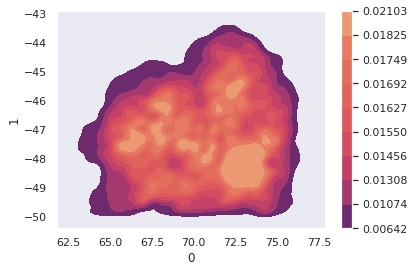

In [ ]:
sn.set(style='dark',)

res = sn.kdeplot(data['RA'], data['DEC'], shade=True, cmap="flare_r", cbar=True)
#res = sn.kdeplot(data[0], data[1], shade=True,cmap="Blues_r")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


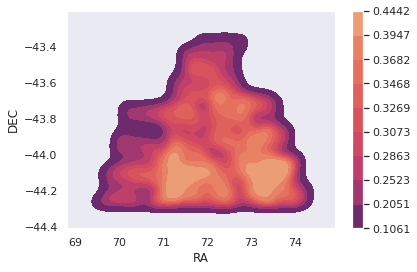

In [ ]:
sn.set(style='dark',)

res = sn.kdeplot(TEST_data['RA'], TEST_data['DEC'], levels=10, shade=True, cmap="flare_r", cbar=True, multiple='layer', common_norm=True, common_grid=True)
#sn.displot(TEST_data, shade=True,cmap="YlOrRd")
plt.show()

In [ ]:
#ValueError: 'violet' is not a valid value for name; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'ma...

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1689: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1213: UserWarning: The following kwargs were not used by contour: 'kind'
  **contour_kws,


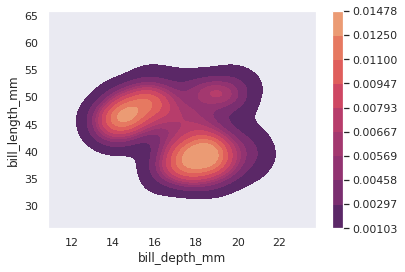

In [ ]:
penguins = sn.load_dataset("penguins")


sn.kdeplot(data  = penguins, x="bill_length_mm", y="bill_depth_mm", vertical=True, kind="kde", shade=True, gridsize=400, cmap="flare_r", cbar=True)

#sn.displot(penguins, x="bill_length_mm", y="bill_depth_mm", kind="kde")

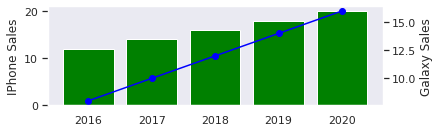

In [ ]:
import matplotlib.pyplot as plt

# data prep (I made up data no accuracy in these stats)
mobile = ['Iphone','Galaxy','Pixel']

# Data for the mobile units sold for 4 Quaters in Million
units_sold = (('2016',12,8,6),
('2017',14,10,7),
('2018',16,12,8),
('2019',18,14,10),
('2020',20,16,5),)
# data prep - splitting the data
Years, IPhone_Sales, Galaxy_Sales, Pixel_Sales = zip(*units_sold)

# set the position
Position = list(range(len(units_sold)))

# set the width
Width = 0.2

plt.subplot(2, 1, 1)
Iphone = plt.bar(Position, IPhone_Sales,color='green')
plt.ylabel('IPhone Sales')
plt.xticks(Position, Years)

plt.twinx()
Galaxy = plt.plot(Position, Galaxy_Sales, 'o-', color='blue')
plt.ylabel('Galaxy Sales')
plt.xticks(Position, Years)

#plt.subplot(2, 1, 2)
#plt.plot(Position, Pixel_Sales, color='yellow')
#plt.ylabel('Pixel Sales')
#plt.gca().set_ylim(ymin=0)
#plt.xticks(Position, Years)

# plt.show()
#plt.savefig('CombiningGraphs.png', dpi=72)

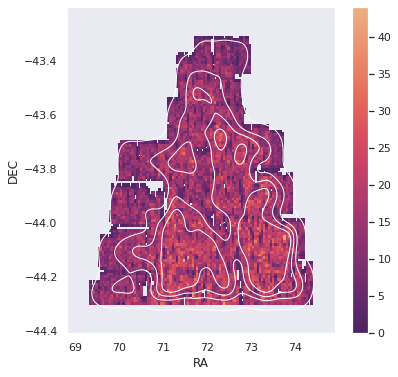

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="dark")

# Simulate data from a bivariate Gaussian
#n = 10000
#mean = [0, 0]
#cov = [(2, .4), (.4, .2)]
#rng = np.random.RandomState(0)
#x, y = rng.multivariate_normal(mean, cov, n).T

# Draw a combo histogram and scatterplot with density contours
f, ax = plt.subplots(figsize=(6, 6))
sns.histplot(x=TEST_data['RA'], y=TEST_data['DEC'], bins=100, cbar =True, cmap = "flare_r")
sns.kdeplot(x=TEST_data['RA'], y=TEST_data['DEC'], levels=5, color="w", linewidths=1) 